In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None) 
import seaborn as sns


In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'city', 'age', 'python_yn', 'r_yn'],
      dtype='object')

In [4]:
df.drop(columns = ['Unnamed: 0.1', "Unnamed: 0"], axis = 1, inplace = True)

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower() or 'Statistician' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'manager' in title.lower() or'manager,' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    else:
        return 'jr'
 

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.seniority.value_counts()

seniority
jr        303
senior    278
Name: count, dtype: int64

In [9]:
df['seniority'].count()

581

In [10]:
df.seniority.count()

581

In [11]:
df['min_salary'] = df.apply(lambda x : x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x : x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [12]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,age,python_yn,r_yn
count,581.000000,581.000000,581.000000,581.0,581.000000,581.000000,581.000000,581.000000,581.000000,581.0
mean,3.907745,1939.975904,0.036145,0.0,108.762478,161.697556,131.673959,84.024096,0.041308,0.0
std,0.332895,68.127235,0.186811,0.0,38.283769,67.396124,46.587282,68.127235,0.199173,0.0
min,2.900000,1799.000000,0.000000,0.0,52.000000,75.000000,43.110000,6.000000,0.000000,0.0
25%,3.700000,1856.000000,0.000000,0.0,80.000000,115.000000,98.000000,30.000000,0.000000,0.0
50%,4.000000,1969.000000,0.000000,0.0,98.000000,147.000000,121.000000,55.000000,0.000000,0.0
75%,4.100000,1994.000000,0.000000,0.0,127.000000,190.000000,152.000000,168.000000,0.000000,0.0
max,4.700000,2018.000000,1.000000,0.0,300.000000,800.000000,475.000000,225.000000,1.000000,0.0


In [13]:
df = df

In [14]:
df.avg_salary

0      101.00
1       86.00
2      171.50
3       96.50
4      113.00
5      150.00
6      107.00
7      136.00
8       75.00
9       82.50
10      85.00
11     110.00
12      43.11
13     156.00
14     114.00
15     128.50
16      65.00
17     127.50
18      95.00
19     147.50
20     121.00
21      95.50
22      98.50
23      52.50
24     185.00
25     175.00
26     128.50
27     190.00
28     116.00
29     124.00
30     110.50
31     112.50
32     145.00
33     168.00
34     102.50
35     134.00
36      98.00
37     145.00
38     109.50
39     128.50
40     137.00
41     107.00
42      85.00
43     190.00
44     200.00
45     128.50
46     190.00
47     190.00
48      92.50
49     190.00
50      91.00
51     138.00
52     122.50
53     104.50
54      92.50
55     193.00
56     132.50
57     151.00
58     138.00
59     123.00
60     127.50
61     190.00
62      98.00
63      98.00
64     167.50
65     121.00
66      89.00
67      83.50
68      80.50
69      94.00
70     117.00
71    

<Axes: >

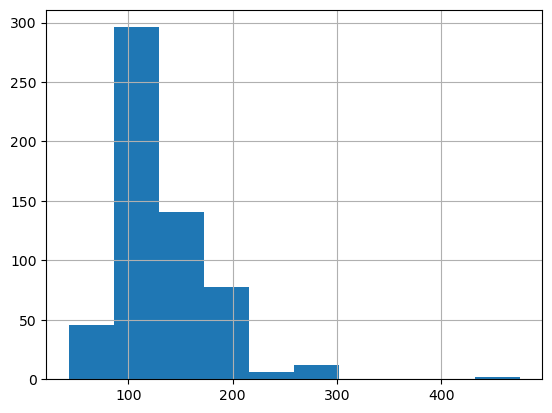

In [19]:
df.avg_salary.hist()

In [16]:
corr = df[['avg_salary','Rating','age']].corr()
corr

,avg_salary,Rating,age
avg_salary,1.000000,0.076811,-0.312357
Rating,0.076811,1.000000,0.112042
age,-0.312357,0.112042,1.000000


<Axes: >

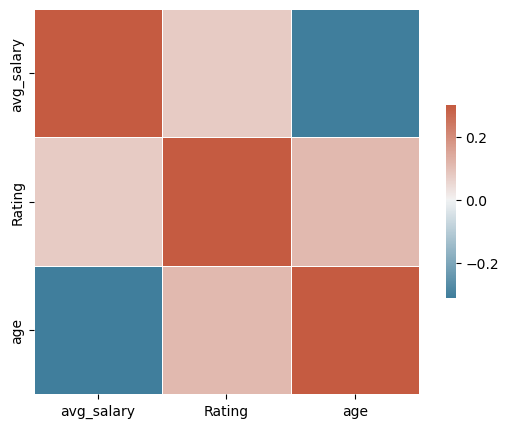

In [21]:
f,ax = plt.subplots(figsize = (7,5))

cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(corr,  cmap = cmap, vmax = .3, center = 0 , square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'city', 'age',
       'python_yn', 'r_yn', 'job_simp', 'seniority'],
      dtype='object')

In [24]:
df_cat = df[['Company Name', 'Location', 'Size', 'Type of ownership','Industry', 'Sector', 'Revenue','job_state','python_yn', 'r_yn', 'job_simp', 'seniority']]

Graph for Company Name: total = 94


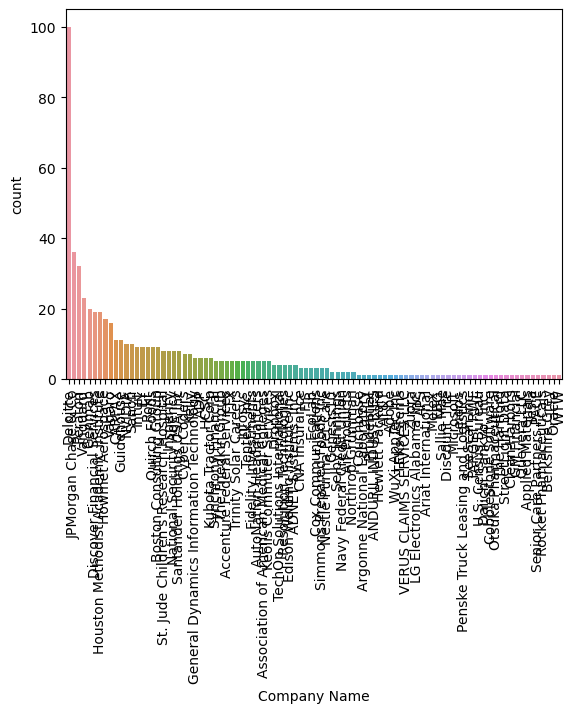

Graph for Location: total = 85


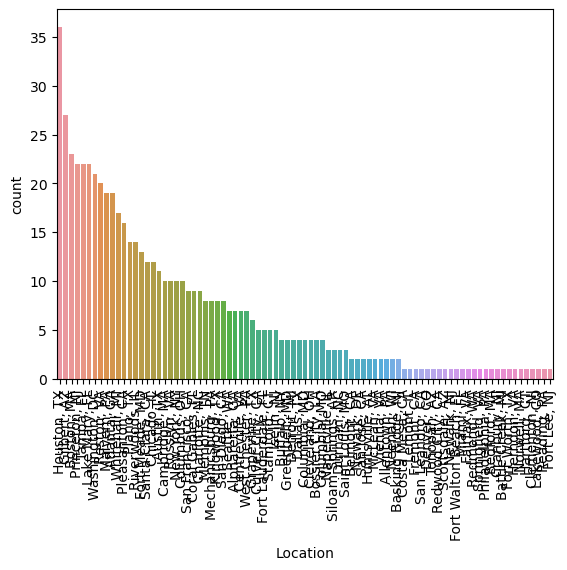

Graph for Size: total = 8


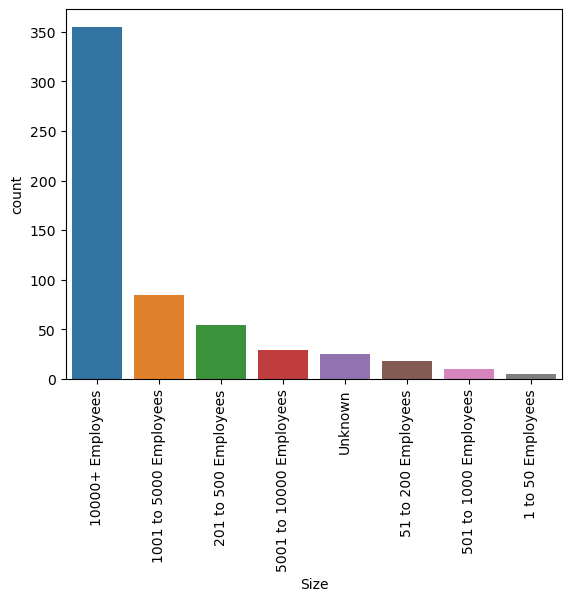

Graph for Type of ownership: total = 6


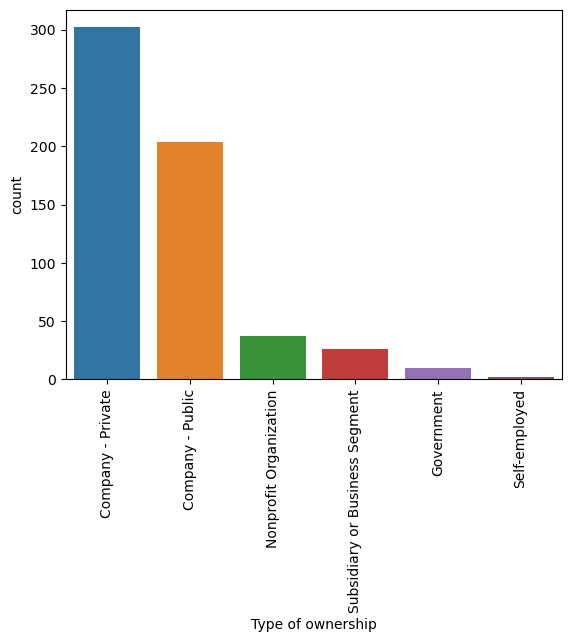

Graph for Industry: total = 35


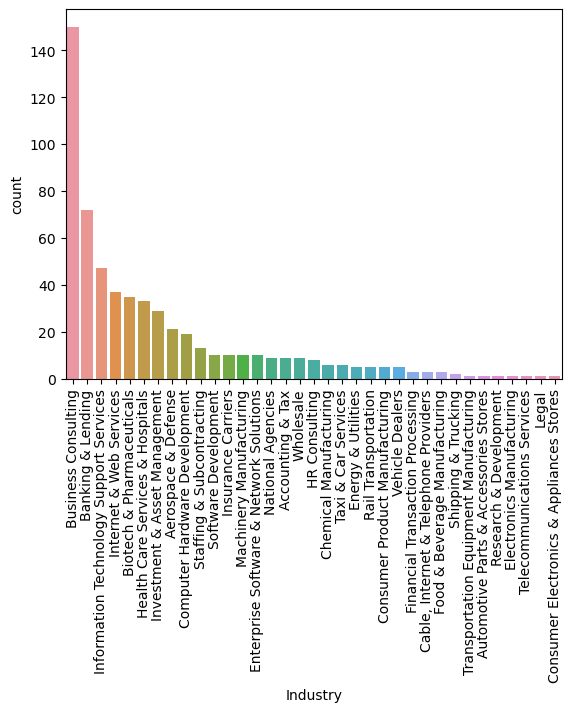

Graph for Sector: total = 15


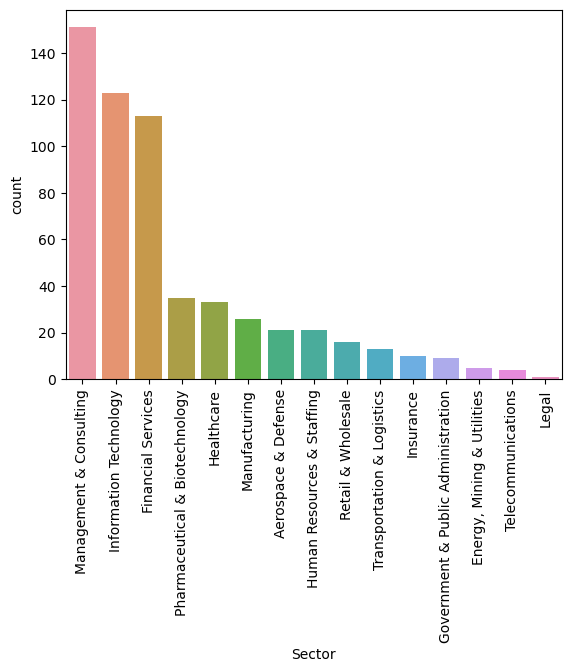

Graph for Revenue: total = 10


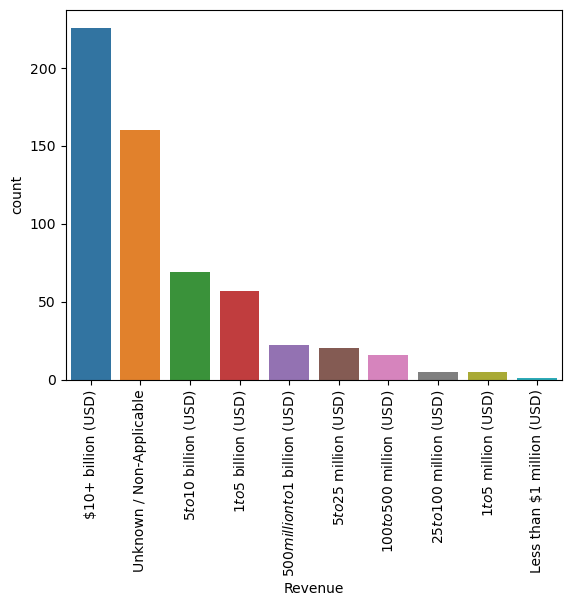

Graph for job_state: total = 26


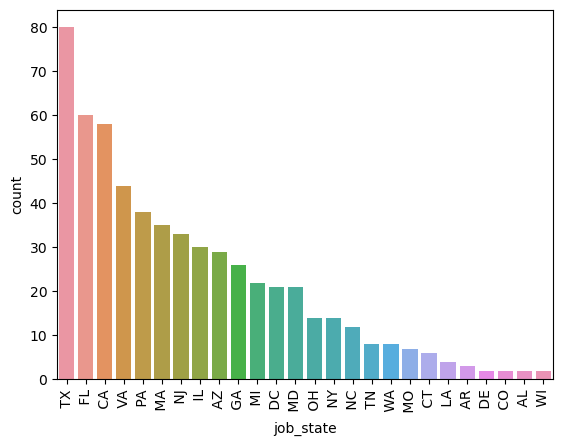

Graph for python_yn: total = 2


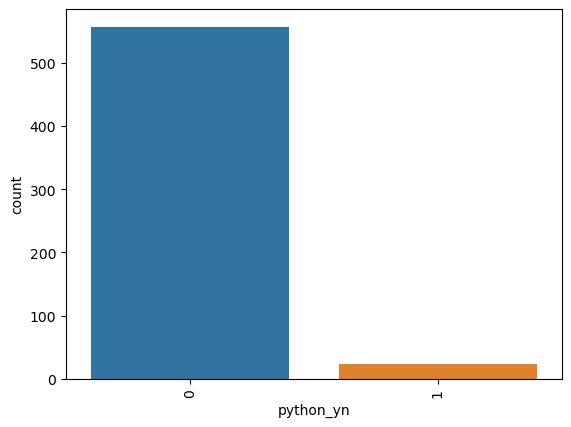

Graph for r_yn: total = 1


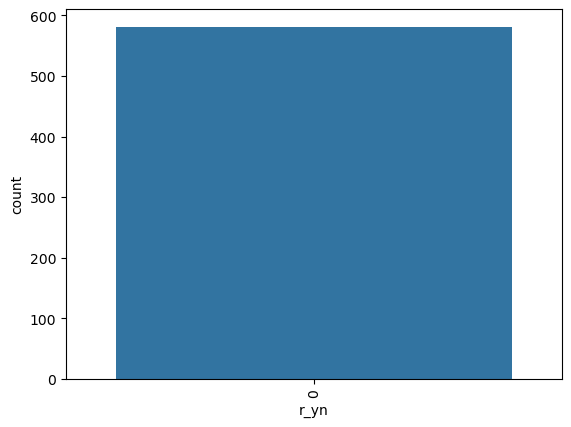

Graph for job_simp: total = 7


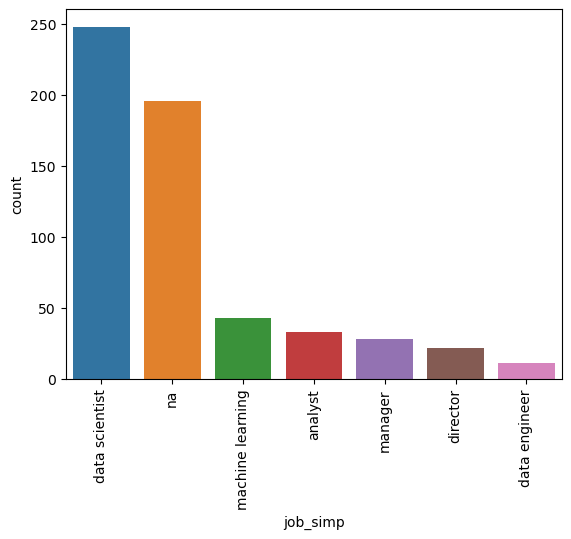

Graph for seniority: total = 2


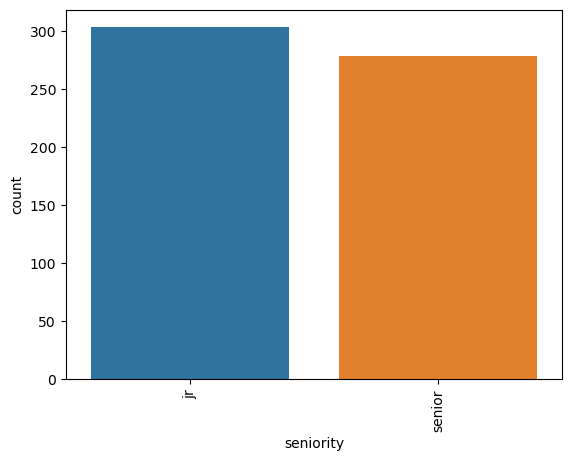

In [28]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d'%(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num, data = df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


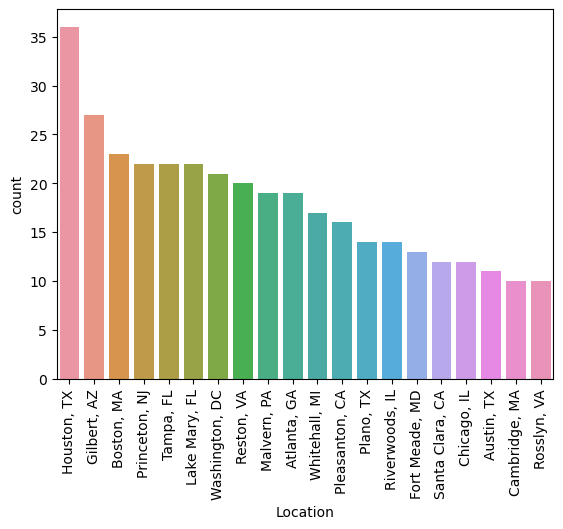

Graph for Company Name: total = 20


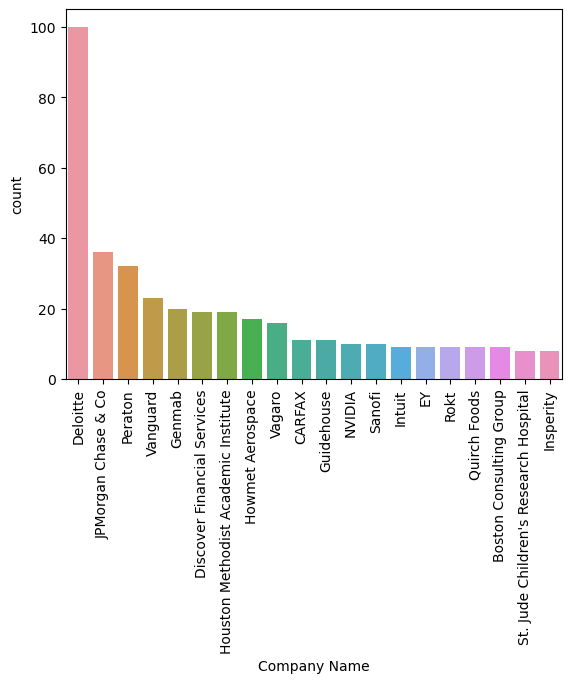

In [31]:
for i in df_cat[['Location', 'Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: total = %d'%(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num, data = df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [37]:
pd.pivot_table(df,index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp         seniority            
analyst          senior      98.272727
data engineer    jr          92.409091
data scientist   jr         133.557692
                 senior     135.474576
director         jr         130.230769
                 senior     150.666667
machine learning jr         136.053571
                 senior     160.300000
manager          senior     123.785714
na               jr         123.661736
                 senior     149.366667

In [45]:
pd.pivot_table(df,index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                    
 WI       na                         2
 WA       machine learning           3
          data scientist             5
 VA       na                         5
          data scientist            39
 TX       na                        19
          manager                    1
          machine learning          12
          director                   3
          data scientist            35
          analyst                   10
 TN       data scientist             8
 PA       manager                    2
          data scientist            20
          analyst                    9
          na                         7
 OH       na                        10
          manager                    4
 NY       data scientist            14
 NJ       machine learning           5
          director                  15
          data scientist            11
          na                         2
 NC       na                         1
          data scientist             6
          analyst                    5
 MO       na                         3
          data scientist             4
 MI       analyst                    1
          na                         7
          manager                    4
          machine learning          10
 MD       data scientist            21
 MA       na                        25
          machine learning           2
          data scientist             8
 LA       data scientist             4
 IL       na                        24
          machine learning           3
          data scientist             3
 GA       na                        12
          manager                    6
          director                   4
          data scientist             4
 FL       data engineer              6
          na                        15
          manager                    9
          data scientist            30
 DE       manager                    1
          na                         1
 DC       na                         6
          data scientist            10
          analyst                    5
 CT       na                         5
          data scientist             1
 CO       na                         1
          data scientist             1
 CA       na                        35
          manager                    1
          machine learning           8
          data scientist            14
 AZ       data engineer              5
          na                        16
          data scientist             8
 AR       analyst                    3
 AL       data scientist             2

In [46]:
pd.pivot_table(df[df['job_simp'] == 'data scientist'],index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CT,185.000000
MA,165.000000
NY,164.428571
VA,155.871795
CO,150.000000
TN,145.000000
GA,138.875000
DC,138.050000
MD,136.380952


In [47]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'city', 'age',
       'python_yn', 'r_yn', 'job_simp', 'seniority'],
      dtype='object')

In [57]:
df_pivots = df[['Rating','Industry', 'Type of ownership','Sector','Revenue', 'hourly', 'employer provided', 'python_yn', 'r_yn','avg_salary']]

In [58]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
4.6     206.222222
3.6     179.942857
3.4     176.954545
4.4     172.100000
3.3     170.500000
3.7     143.331461
4.3     135.416667
4.7     130.416667
4.2     128.520833
3.9     126.252750
3.5     123.642857
4.0     117.906061
4.1     112.029412
3.8     104.211500
3.2     102.370968
3.0     101.000000
4.5      94.166667
2.9      78.000000
Industry
                                          avg_salary
Industry                                            
Computer Hardware Development             216.552632
Transportation Equipment Manufacturing    195.000000
Staffing & Subcontracting                 173.846154
Internet & Web Services                   171.972973
Vehicle Dealers                           170.500000
Telecommunications Services               167.000000
Software Development                      158.100000
Energy & Utilities                        155.000000
Taxi & Car Services                       154.166667
Consumer Product Manu

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [61]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),57.0,NaN
$1 to $5 million (USD),5.0,NaN
$10+ billion (USD),224.0,2.0
$100 to $500 million (USD),14.0,2.0
$25 to $100 million (USD),5.0,NaN
$5 to $10 billion (USD),66.0,3.0
$5 to $25 million (USD),19.0,1.0
$500 million to $1 billion (USD),22.0,NaN
Less than $1 million (USD),1.0,NaN


In [59]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'city', 'age',
       'python_yn', 'r_yn', 'job_simp', 'seniority'],
      dtype='object')